# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
print(f'x_train_image.shape={x_train_image.shape}, y_train_label.shape={y_train_label.shape}, x_test_image.shape={x_test_image.shape}, y_test_label.shape={y_test_label.shape}')

x_train_image.shape=(60000, 28, 28), y_train_label.shape=(60000,), x_test_image.shape=(10000, 28, 28), y_test_label.shape=(10000,)


In [4]:
x_train_image[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [5]:
#指定測試集與訓練資料集
# Reshape 28*28 to 784
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [6]:
x_Train[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [8]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [9]:
y_Train_OneHot.shape

(60000, 10)

# 建立模型

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#宣告採用序列模型
model = Sequential()

In [12]:
#建構輸入層
# Dense: Just your regular densely-connected NN layer.
# units: Positive integer, dimensionality of the output space
# input_dim: Input dimension
# kernel_initializer: Initializer for the kernel weights matrix (see initializers).
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [13]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [14]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 170us/step - loss: 0.2698 - acc: 0.9222 - val_loss: 0.1329 - val_acc: 0.9611
Epoch 2/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.1080 - acc: 0.9680 - val_loss: 0.1040 - val_acc: 0.9690
Epoch 3/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0713 - acc: 0.9786 - val_loss: 0.0942 - val_acc: 0.9720
Epoch 4/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0511 - acc: 0.9837 - val_loss: 0.0808 - val_acc: 0.9757
Epoch 5/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0807 - val_acc: 0.9755
Epoch 6/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0790 - val_acc: 0.9775
Epoch 7/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.0201 - acc: 0.9942 - val_loss: 0.0875 - 

# 以圖形顯示訓練過程

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

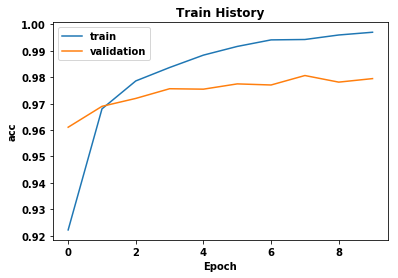

In [18]:
show_train_history(train_history, train='acc', validation='val_acc')

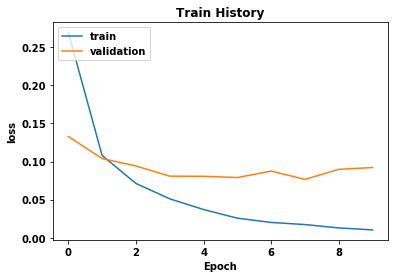

In [19]:
show_train_history(train_history, train='loss', validation='val_loss')

# 評估模型準確率

In [20]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 43us/step

accuracy= 0.9796


# 作業:
    [練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
